# Students Do: Predicting Fraudulent Loans Applications

Every year, banks and credit card companies lose billions of dollars to compensating users for fraudulent loan or credit card applications. That's one reason why predicting fraud using machine learning techniques becomes a [broad area of research](https://scholar.google.com.mx/scholar?q=fraud+detection+machine+learning&btnG=&oq=fraud+detection+) and a great [business opportunity for FinTech startups](https://www.eu-startups.com/2019/06/paris-based-fintech-bleckwen-raises-e8-8-million-for-its-fraud-detection-software-to-prevent-financial-crime/).

In this activity, you are going to explore how tree-based algorithms can be used to identify fraudulent loan applications. You will start using a decision tree model that will be trained with the `sba_loans_encoded.csv` file that you created before.

In [4]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

## Loading and Preprocessing Loans Encoded Data

Load the `sba_loans_encoded.csv` in a pandas DataFrame called `df_loans`.

In [5]:
# Loading data
df_loans = pd.read_csv(Path('../Resources/sba_loans_encoded.csv'))

Define the features set, by copying the `df_loans` DataFrame and dropping the `Default` column.

In [6]:
# Define features set
X = df_loans.drop(columns = 'Default')

Create the target vector by assigning the values of the `Default` column from the `df_loans` DataFrame.

In [7]:
# Define target vector
y = df_loans['Default']

Split the data into training and testing sets.

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

Use the `StandardScaler` to scale the features data, remember that only `X_train` and `X_testing` DataFrames should be scaled.

In [9]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train, y_train)

In [11]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Decision Tree Model

Once data is scaled, create a decision tree instance and train it with the training data (`X_train_scaled` and `y_train`).

In [12]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [13]:
# Fit the model
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

## Making Predictions Using the Tree Model

Validate the trained model, by predicting fraudulent loan applications using the testing data (`X_test_scaled`).

In [14]:
# Making predictions using the testing data
y_pred = model.predict(X_test_scaled)

## Model Evaluation

Evaluate model's results, by using `sklearn` to calculate the confusion matrix, the accuracy score and to generate the classification report.

In [15]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score
acc = accuracy_score(y_test, y_pred)

In [16]:
# Displaying results
print(f'Confusion matrix:\n{cm}')
print(f'Accuracy: {acc}')

Confusion matrix:
[[333  23]
 [ 24 145]]
Accuracy: 0.9104761904761904


## Visualizing the Decision Tree

In this section, you should create a visual representation of the decision tree using `pydotplus`. Show the graph on the notebook, and also save it in `PDF` and `PNG` formats.

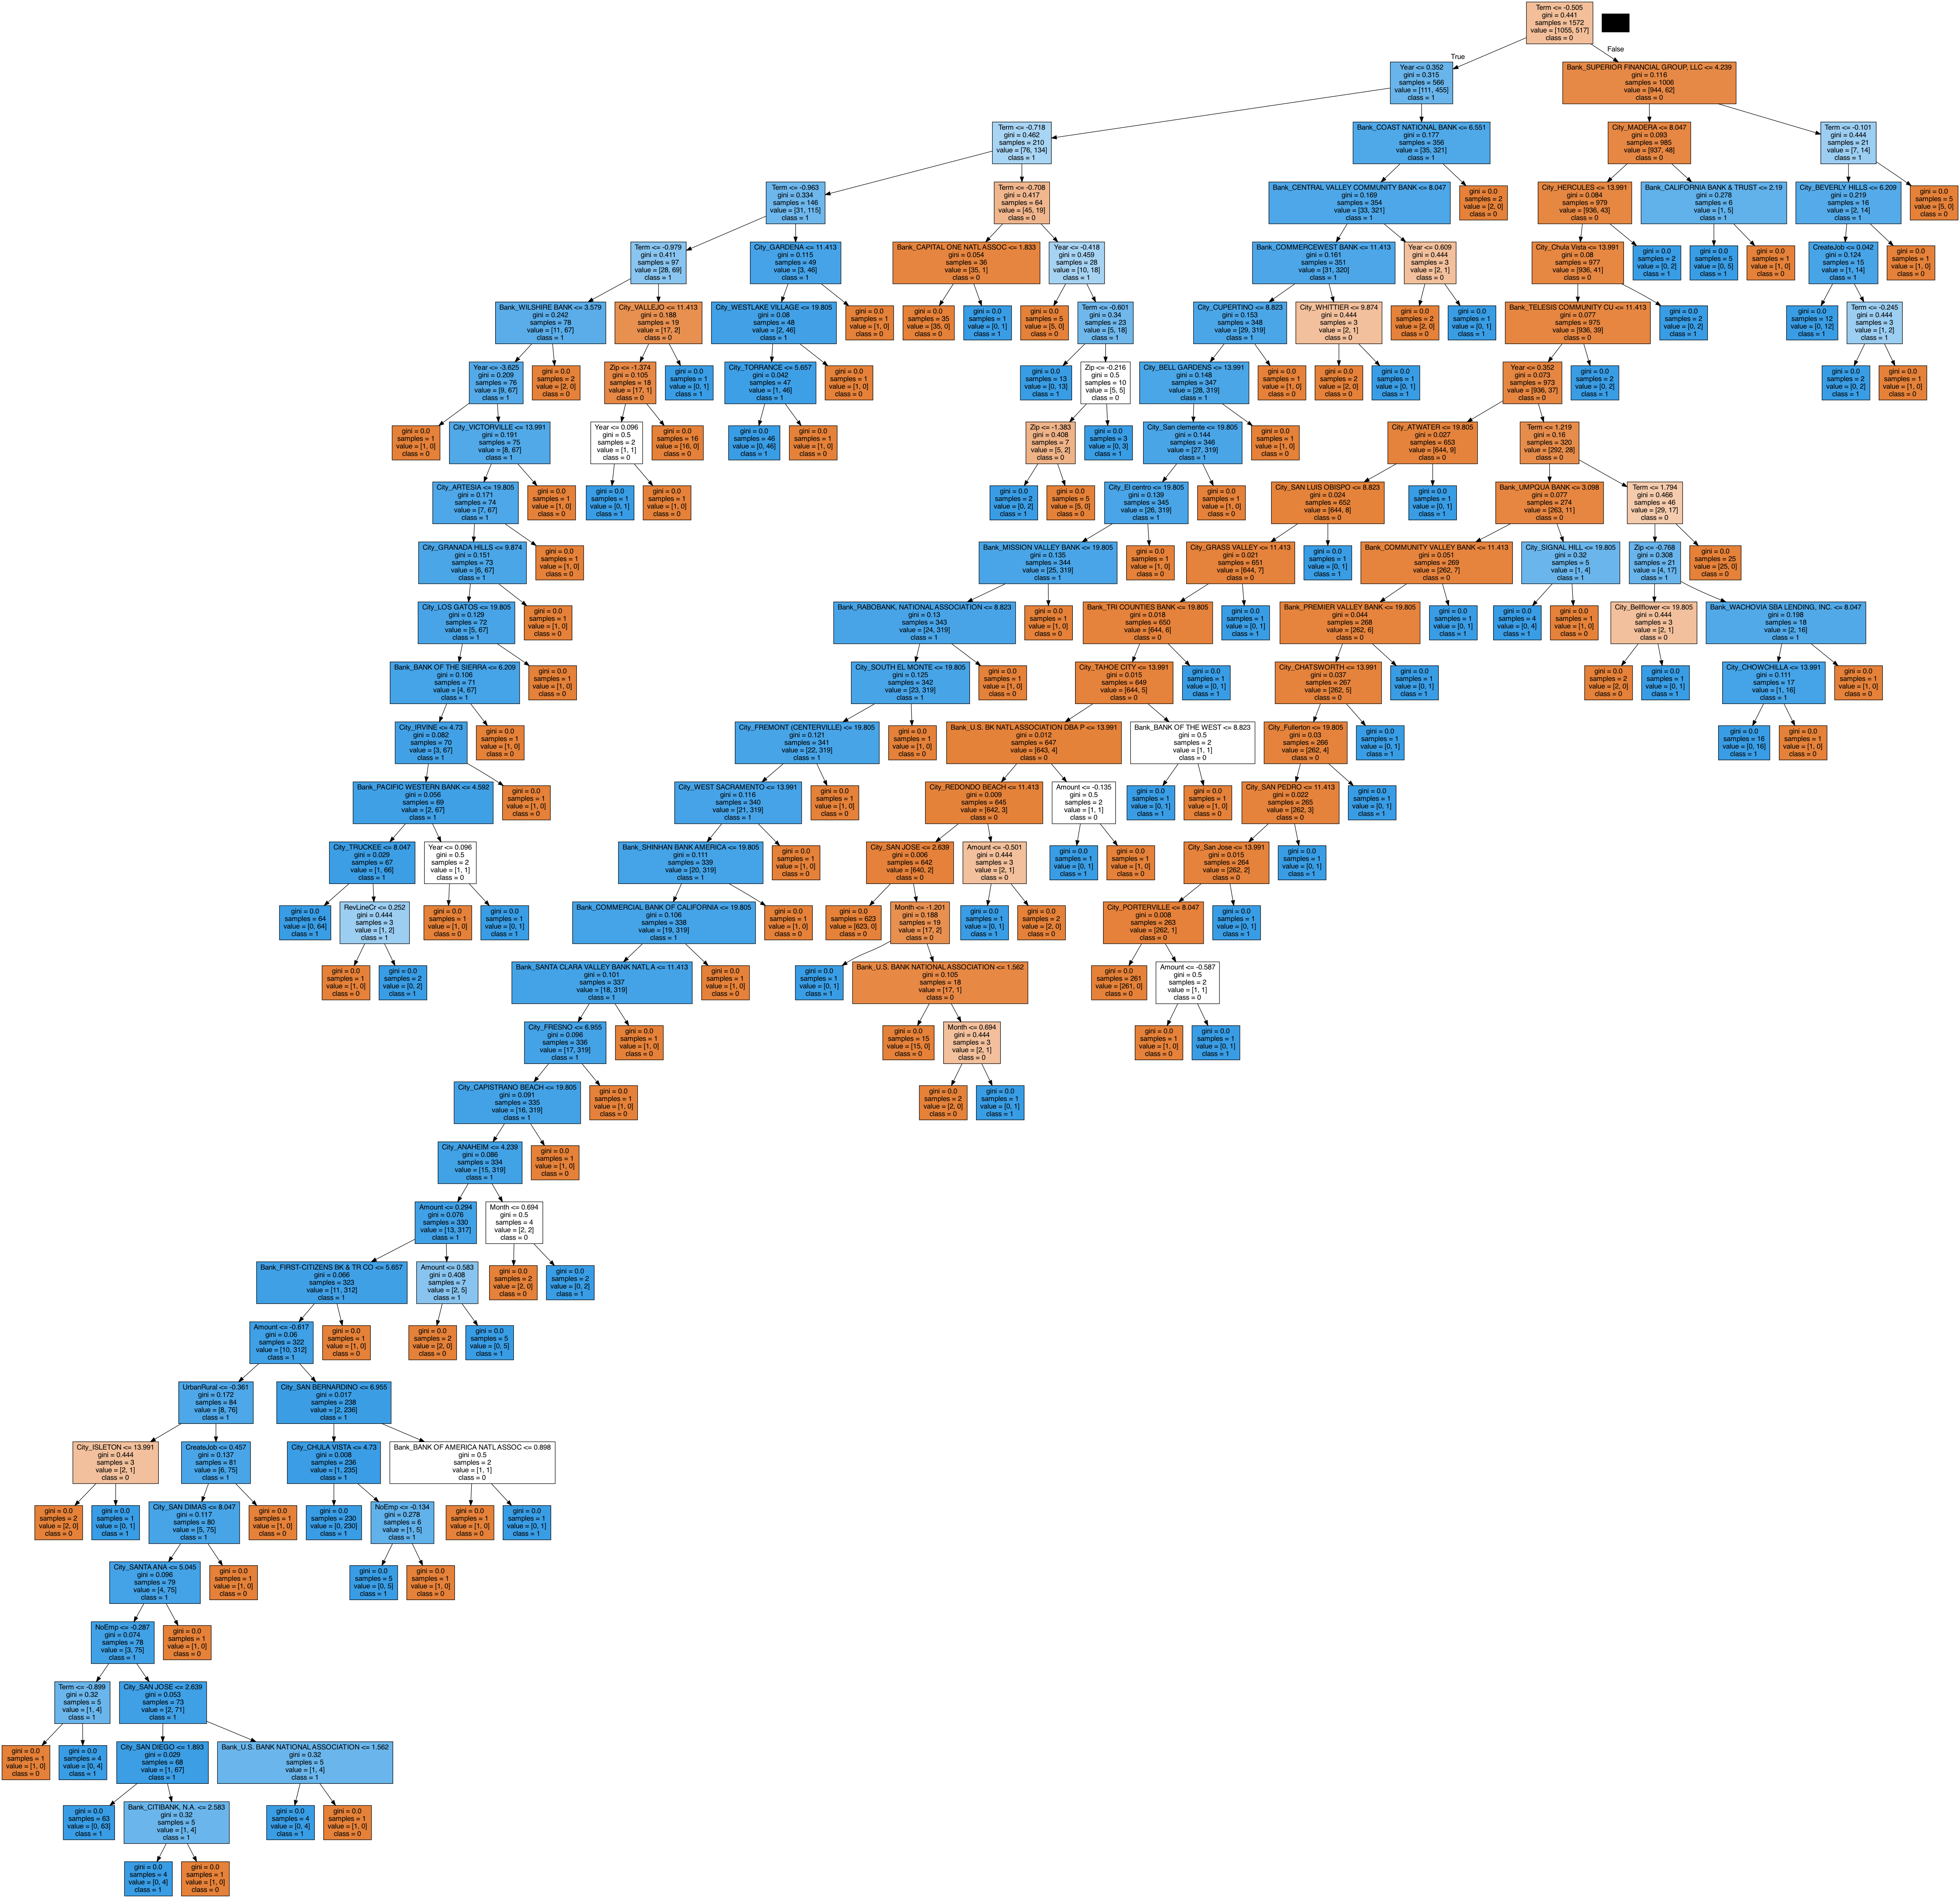

In [17]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [19]:
# Saving the tree as PDF
pdf_file_path = ("../Resources/credit_tree.pdf")
graph.write_pdf(pdf_file_path)

# Saving the tree as PNG
png_file_path = ("../Resources/credit_tree.png")
graph.write_png(png_file_path)

True

## Analysis Question

Finally, analyze the model's evaluation results and answer the following question.

* Would you trust in this model to deploy a loans application approval solution in a bank?

 * **Your answer here**